In [1]:
! pip install yfinance

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import tensorflow as tf

In [3]:
df=yf.download('ADANIPOWER.NS')
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-08-20,108.000000,110.000000,98.300003,100.099998,100.099998,164328256
2009-08-21,99.900002,103.900002,98.000000,103.150002,103.150002,33717840
2009-08-24,103.900002,104.400002,101.550003,103.099998,103.099998,13665282
2009-08-25,102.500000,103.150002,101.000000,102.750000,102.750000,11720267
2009-08-26,103.000000,107.500000,102.849998,105.099998,105.099998,17158838


In [4]:
df.index

DatetimeIndex(['2009-08-20', '2009-08-21', '2009-08-24', '2009-08-25',
               '2009-08-26', '2009-08-27', '2009-08-28', '2009-08-31',
               '2009-09-01', '2009-09-02',
               ...
               '2024-01-08', '2024-01-09', '2024-01-10', '2024-01-11',
               '2024-01-12', '2024-01-15', '2024-01-16', '2024-01-17',
               '2024-01-18', '2024-01-19'],
              dtype='datetime64[ns]', name='Date', length=3558, freq=None)

In [6]:
data=pd.DataFrame(df["Close"])
data.head()

,Close
Date,
2009-08-20,100.099998
2009-08-21,103.150002
2009-08-24,103.099998
2009-08-25,102.750000
2009-08-26,105.099998


In [7]:
data.isna().sum()

Close    0
dtype: int64

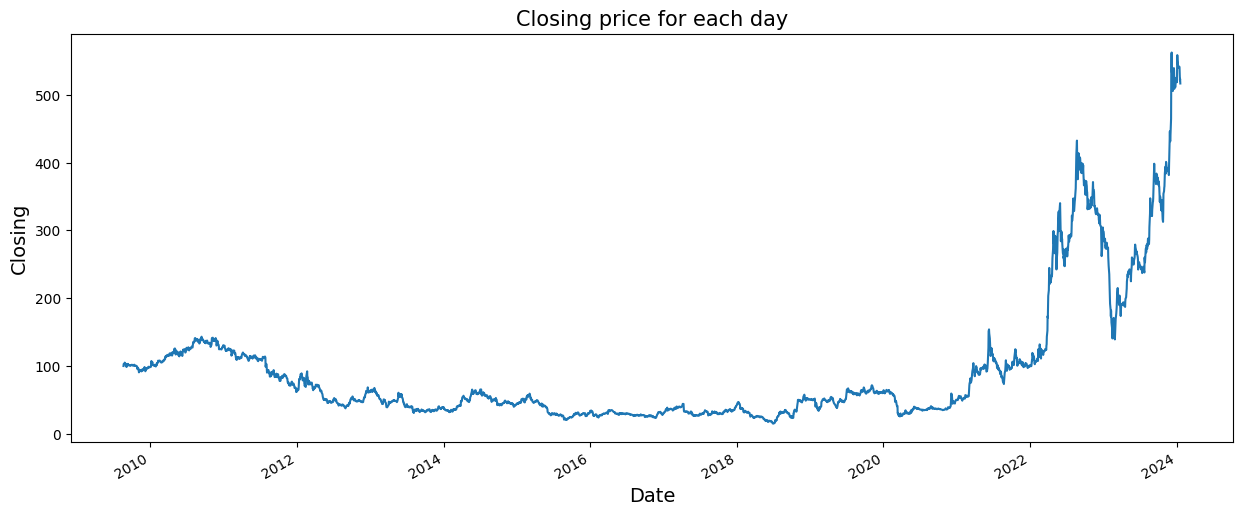

In [8]:
data.plot(figsize=(15, 6), legend=None)
plt.xlabel("Date",fontsize=14)
plt.ylabel("Closing",fontsize=14)
plt.title("Closing price for each day",fontsize=15)
plt.show()

In [9]:
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    print("Result of Dickey-Fuller Test:")
    result=adfuller(timeseries, autolag="AIC")
    result=pd.Series(result[0:4],index=["Test Statistic","p-value","no. of lags Used","Number Of Obersvations Used"])

    print(result)

    if result[1] <=0.05:
        print("Strong evidance Against null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidance Against null hypothesis")
        print(" Fail to Reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

adf_test(data)

Result of Dickey-Fuller Test:
Test Statistic                    1.058018
p-value                           0.994842
no. of lags Used                 28.000000
Number Of Obersvations Used    3529.000000
dtype: float64
Weak evidance Against null hypothesis
 Fail to Reject the null hypothesis
Data has a unit root and is non-stationary


In [10]:
y=data["Close"]
y

Date
2009-08-20    100.099998
2009-08-21    103.150002
2009-08-24    103.099998
2009-08-25    102.750000
2009-08-26    105.099998
                 ...    
2024-01-15    541.150024
2024-01-16    532.299988
2024-01-17    521.450012
2024-01-18    523.549988
2024-01-19    516.750000
Name: Close, Length: 3558, dtype: float64

In [11]:
train=y[:"2021"]
test=y["2022":]

In [12]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.6 MB/s eta 0:00:00


In [13]:
from pmdarima.arima import auto_arima

arima_model=auto_arima(train,
                      seasonal=True, m=12,stationary=True, stewise=False, trace= 1, random_state=10)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=21.31 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=29885.756, Time=0.08 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=inf, Time=4.15 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=22739.018, Time=4.86 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=34336.359, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=25857.655, Time=1.32 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=17322.901, Time=13.45 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=17542.970, Time=12.81 sec
 ARIMA(0,0,1)(2,0,1)[12] intercept   : AIC=inf, Time=43.10 sec
 ARIMA(0,0,1)(1,0,2)[12] intercept   : AIC=inf, Time=30.11 sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : AIC=20975.205, Time=23.12 sec
 ARIMA(0,0,1)(2,0,0)[12] intercept   : AIC=17403.950, Time=41.16 sec
 ARIMA(0,0,1)(2,0,2)[12] intercept   : AIC=inf, Time=51.92 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=20375.496, Time=11.49 sec
 ARIMA(1,0,1)(1,0,1)[12] i

In [14]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

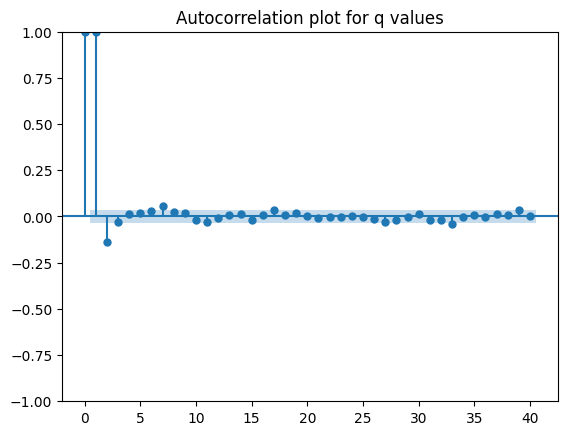

In [15]:
title="Autocorrelation plot for q values"
lags=40
plot_pacf(train,title=title,lags=lags);

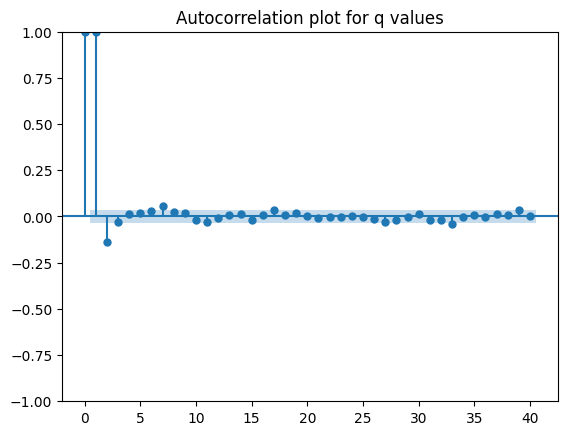

In [16]:
title="Autocorrelation plot for q values"
lags=40
plot_pacf(train,title=title,lags=lags,method="ywm");

##ARIMA MODEL

In [17]:
from statsmodels.tsa.arima.model import ARIMA

In [18]:
model=ARIMA(train,order=(1,0,0))
results=model.fit()
results.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 3050
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -6134.208
Date:                Fri, 19 Jan 2024   AIC                          12274.416
Time:                        18:06:55   BIC                          12292.485
Sample:                             0   HQIC                         12280.910
                               - 3050                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         58.9972     19.164      3.079      0.002      21.437      96.557
ar.L1          0.9984      0.001   1033.743      0.000       0.997       1.000
sigma2         3.2630      0.025    128.023      0.000       3.213       3.313
===================================================================================
Ljung-Box (L1) (Q):                  94.50   Jarque-Bera (JB):             65194.66
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.40   Skew:                             1.33
Prob(H) (two-sided):                  0.00   Kurtosis:                        25.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
pred=results.get_forecast(steps=36)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<Axes: xlabel='Date'>

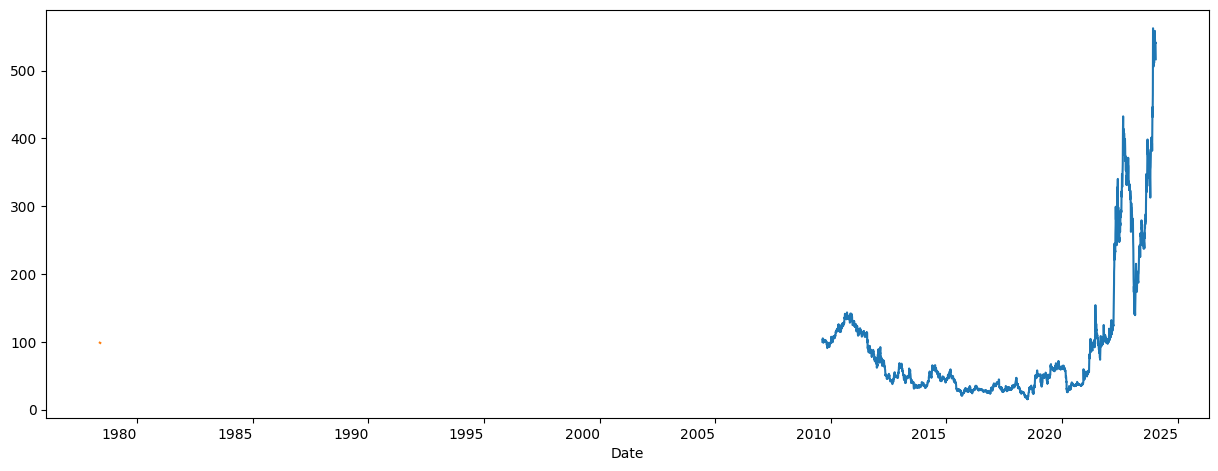

In [24]:
ax1=y["2000":].plot(label="Observed")
pred.predicted_mean.plot(ax= ax1,label="ARIMA Forecast",figsize=(15,6), linestyle="dashed")

##SARIMA MODEL

In [25]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model1=SARIMAX(train,order=(1,1,2), seasonal_order=(1,0,1,12),enforce_stationarity=False,enforse_invertibility=False)
fitted_model=model1.fit(maxiter=200)
print(fitted_model.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['enforse_invertibility']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


                                      SARIMAX Results                                       
Dep. Variable:                                Close   No. Observations:                 3050
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -6052.203
Date:                              Fri, 19 Jan 2024   AIC                          12116.405
Time:                                      18:11:31   BIC                          12152.511
Sample:                                           0   HQIC                         12129.385
                                             - 3050                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0276      0.178      0.155      0.877      -0.322       0.377
ma.L1          0.14

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<Axes: xlabel='Date'>

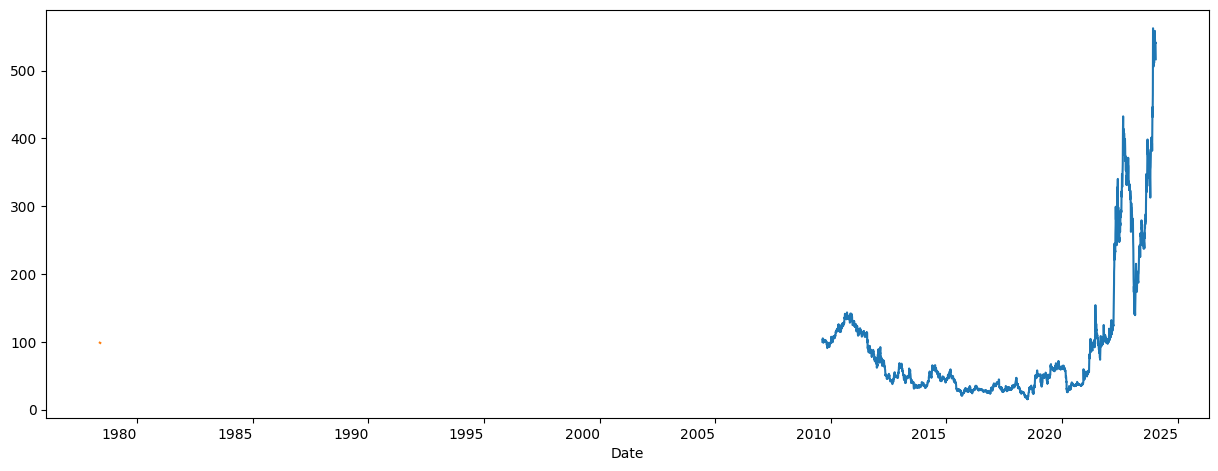

In [26]:
pred1=fitted_model.get_forecast(steps=36)
ax1=y["2000":].plot(label="Observed")
pred.predicted_mean.plot(ax= ax1,label="SARIMAX Forecast",figsize=(15,6), linestyle="dashed")

##LSTM MODEL

<Axes: xlabel='Date'>

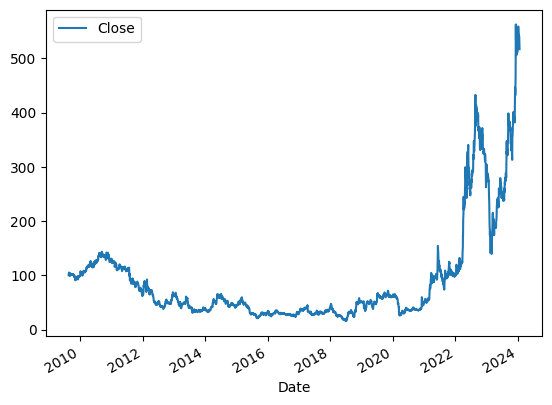

In [27]:
data.plot()

In [28]:
data.size-5

3553

In [29]:
train=data.iloc[:data.size-5]
test=data.iloc[data.size-5:]

In [30]:
train

,Close
Date,
2009-08-20,100.099998
2009-08-21,103.150002
2009-08-24,103.099998
2009-08-25,102.750000
2009-08-26,105.099998
...,...
2024-01-08,541.700012
2024-01-09,539.750000
2024-01-10,542.299988


In [31]:
test

,Close
Date,
2024-01-15,541.150024
2024-01-16,532.299988
2024-01-17,521.450012
2024-01-18,523.549988
2024-01-19,516.750000


In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [33]:
scaler.fit(train)

MinMaxScaler()

In [34]:
scaled_train=scaler.transform(train)

In [35]:
scaled_train

array([[0.15476734],
       [0.16034372],
       [0.1602523 ],
       ...,
       [0.96325069],
       [0.95931987],
       [0.96114819]])

In [36]:
scaled_test=scaler.transform(test)

In [37]:
scaled_test

array([[0.96114819],
       [0.94496748],
       [0.92513025],
       [0.92896968],
       [0.91653712]])

In [38]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [39]:
n_inputs=5
n_feature=1

In [40]:
generator=TimeseriesGenerator(scaled_train,scaled_train,length=n_inputs,batch_size=n_feature)

In [41]:
scaled_train[:7]

array([[0.15476734],
       [0.16034372],
       [0.1602523 ],
       [0.15961239],
       [0.16390894],
       [0.16326903],
       [0.1630862 ]])

In [42]:
generator[0]

(array([[[0.15476734],
         [0.16034372],
         [0.1602523 ],
         [0.15961239],
         [0.16390894]]]),
 array([[0.16326903]]))

In [43]:
x=generator[0][0]

In [44]:
y=generator[0][1]

In [45]:
y

array([[0.16326903]])

In [46]:
x

array([[[0.15476734],
        [0.16034372],
        [0.1602523 ],
        [0.15961239],
        [0.16390894]]])

In [47]:
scaled_train[:5]

array([[0.15476734],
       [0.16034372],
       [0.1602523 ],
       [0.15961239],
       [0.16390894]])

In [48]:
scaled_train[5]

array([0.16326903])

In [49]:
y

array([[0.16326903]])

In [50]:
x.shape

(1, 5, 1)

In [51]:
y.shape

(1, 1)

In [52]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [53]:
model_lstm=Sequential()
model_lstm.add(LSTM(128,input_shape=(n_inputs,n_feature),return_sequences=True))
model_lstm.add(LSTM(128,return_sequences=True))
model_lstm.add(LSTM(128))
model_lstm.add(Dense(64,activation='relu'))
model_lstm.add(Dense(64,activation='relu'))
model_lstm.add(Dense(1))

In [54]:
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 128)            66560     
                                                                 
 lstm_1 (LSTM)               (None, 5, 128)            131584    
                                                                 
 lstm_2 (LSTM)               (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 342,209
Trainable params: 342,209
Non-trai

In [55]:
model_lstm.compile(optimizer='adam',loss='mse')

In [56]:
from keras.callbacks import EarlyStopping
callback=EarlyStopping(monitor='loss',patience=5)
model_lstm.fit(generator,epochs=10,callbacks=[callback])

Epoch 1/10
3548/3548 [==============================] - 69s 16ms/step - loss: 0.0026
Epoch 2/10
3548/3548 [==============================] - 63s 18ms/step - loss: 0.0012
Epoch 3/10
3548/3548 [==============================] - 57s 16ms/step - loss: 9.2432e-04
Epoch 4/10
3548/3548 [==============================] - 58s 16ms/step - loss: 5.9618e-04
Epoch 5/10
3548/3548 [==============================] - 57s 16ms/step - loss: 5.5921e-04
Epoch 6/10
3548/3548 [==============================] - 57s 16ms/step - loss: 4.4524e-04
Epoch 7/10
3548/3548 [==============================] - 57s 16ms/step - loss: 4.6616e-04
Epoch 8/10
3548/3548 [==============================] - 58s 16ms/step - loss: 4.0746e-04
Epoch 9/10
3548/3548 [==============================] - 57s 16ms/step - loss: 3.0028e-04
Epoch 10/10
3548/3548 [==============================] - 57s 16ms/step - loss: 2.4626e-04


In [57]:
my_pred=[]
first_eval_batch=scaled_train[-n_inputs:]
current_batch=first_eval_batch.reshape(1,n_inputs,n_feature)

for i in range(n_inputs):
  pred2=model_lstm.predict(current_batch)[0]
  my_pred.append(pred2)
  current_batch=np.append(current_batch[:,1:,:],[[pred2]],axis=1)

1/1 [==============================] - 0s 36ms/step


In [58]:
pred_val=scaler.inverse_transform(my_pred)

In [59]:
pred_val

array([[515.70598571],
       [493.96580901],
       [477.38587651],
       [464.41051246],
       [454.59106516]])

In [60]:
test

,Close
Date,
2024-01-15,541.150024
2024-01-16,532.299988
2024-01-17,521.450012
2024-01-18,523.549988
2024-01-19,516.750000


In [61]:
test['pred']=pred_val

<ipython-input-61-b4d052856a9b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['pred']=pred_val


In [62]:
test['%error']=((test['Close']-test['pred'])/test['Close'])*100

<ipython-input-62-d280a033d411>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['%error']=((test['Close']-test['pred'])/test['Close'])*100


In [63]:
test

,Close,pred,%error
Date,,,
2024-01-15,541.150024,515.705986,4.701846
2024-01-16,532.299988,493.965809,7.201612
2024-01-17,521.450012,477.385877,8.450309
2024-01-18,523.549988,464.410512,11.295860
2024-01-19,516.750000,454.591065,12.028821


<Axes: xlabel='Date'>

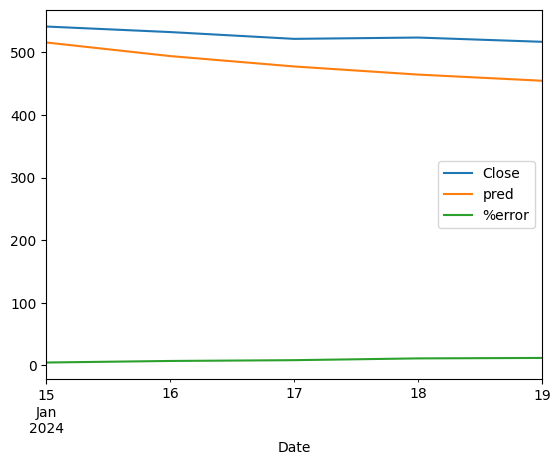

In [64]:
test.plot()